In [1]:
import pandas as pd 
import json, requests
import math
from functools import reduce
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
from utils import get_whole_data, merge_data

## Obliczanie indeksów atrakcyjności dla wypożyczalni i salonu ze względu na powiaty
### dla danych z 2020 ponieważ dane dla 2021 nie były kompletne

### Funkcja do pobierania danych z API (ponieważ maksymalnie na raz można było pobrać 100 rekordów)

### Zmienna odpowiadająca za przeciętne wynagrodzenie brutto:
Zmienna ogółem z podgrupy P2497 (Przeciętne miesięczne wynagrodzenia brutto)

In [2]:
dataFrames = []
dataFrame = get_whole_data(64428, 5,[2020],"Srednie wynagrodzenie brutto")
#dataFrame = get_whole_data("https://bdl.stat.gov.pl/api/v1/data/by-variable/64428?format=json&unit-level=5&year=2020&page-size=100","Srednie wynagrodzenie brutto")
dataFrames.append(dataFrame)
print(dataFrame)

                    area            id  year  Srednie wynagrodzenie brutto
0       Powiat bocheński  011212001000  2020                       4523.92
1       Powiat krakowski  011212006000  2020                       5788.98
2      Powiat miechowski  011212008000  2020                       4415.03
3      Powiat myślenicki  011212009000  2020                       4525.20
4     Powiat proszowicki  011212014000  2020                       4635.66
..                   ...           ...   ...                           ...
375     Powiat węgrowski  071427133000  2020                       4589.75
376     Powiat m.Siedlce  071427164000  2020                       5187.54
377      Powiat grójecki  071427306000  2020                       5088.28
378  Powiat sochaczewski  071427328000  2020                       5741.89
379   Powiat żyrardowski  071427338000  2020                       5113.05

[380 rows x 4 columns]


### Zmienna odpowiadająca za ilość osób zamieszkałych w powiecie:
zmienna (ogółem->miejsce zamieszkania->stan na 31 grudnia-> ogółem) z podgrupy P1336


In [3]:
dataFrame2 = get_whole_data(60641, 5,[2020],"Liczba osob zamieszkalych")
#dataFrame2 = get_whole_data("https://bdl.stat.gov.pl/api/v1/data/by-variable/60641?format=json&unit-level=5&year=2020&page-size=100", "Liczba osob zamieszkalych")
dataFrames.append(dataFrame2)

### Zmienna odpowiadająca za średnią wieku mieszkańca  w powiecie:
Zmienna ogółem z podgrupy P3814 (Mediana wieku ludności według płci) 

In [4]:
dataFrame3 = get_whole_data(746289, 5,[2020],"Srednia wieku")
#dataFrame3 = get_whole_data("https://bdl.stat.gov.pl/api/v1/data/by-variable/746289?format=json&unit-level=5&year=2020&page-size=100", "Srednia wieku")
dataFrames.append(dataFrame3)


### Zmienna odpowiadająca za ilość noclegów udzielonych turystom na 1000 mieszkancow w powiecie:
zmienna turyści korzystający z noclegów na 1000 ludności (ogółem) z podgrupy P2396

In [5]:
dataFrame4 = get_whole_data(60297, 5,[2020],"ilosc noclegow turystow / 1000 mieszkancow")
#dataFrame4 = get_whole_data("https://bdl.stat.gov.pl/api/v1/data/by-variable/60297?format=json&unit-level=5&year=2020&page-size=100", "ilosc noclegow turystow / 1000 mieszkancow")
dataFrames.append(dataFrame4)


### Zmienna odpowiadająca za ścieżki rowerowe w powiecie:
Zmienna ścieżki rowerowe (drogi dla rowerów) ogółem z podgrupy P3164

In [6]:
dataFrame5 = get_whole_data(288080, 5,[2020],"Sciezki rowerowe")
#dataFrame5 = get_whole_data("https://bdl.stat.gov.pl/api/v1/data/by-variable/288080?format=json&unit-level=5&year=2020&page-size=100","Sciezki rowerowe")
dataFrames.append(dataFrame5)

### Zmienna odpowiadająca za liczbę aktywnie ćwiczących mieszkańców w powiecie:
(Zmienna ćwiczący ogółem z podgrupy P2155)

In [7]:
dataFrame6 = get_whole_data(59628, 5,[2020],"Liczba osob aktywnych fizycznie")
#dataFrame6 = get_whole_data("https://bdl.stat.gov.pl/api/v1/data/by-variable/59628?format=json&unit-level=5&year=2020&page-size=100", "Liczba osob aktywnych fizycznie")
dataFrames.append(dataFrame6)

### Merge danych w jeden data frame:

In [8]:
data = merge_data(dataFrames)
len(data)

380

In [9]:
data.head()

,area,year,Srednie wynagrodzenie brutto,Liczba osob zamieszkalych,Srednia wieku,ilosc noclegow turystow / 1000 mieszkancow,Sciezki rowerowe,Liczba osob aktywnych fizycznie
0,Powiat bocheński,2020,4523.92,106947,38.6,255.16,28.5,2186
1,Powiat krakowski,2020,5788.98,281440,40.3,198.84,25.1,9676
2,Powiat miechowski,2020,4415.03,48464,42.8,332.19,14.3,1086
3,Powiat myślenicki,2020,4525.20,127972,38.0,145.22,12.5,5046
4,Powiat proszowicki,2020,4635.66,43057,41.4,62.40,0.2,641


### Data cleaning
W zbiorze danych nie było żadnych brakujących danych jak i również nie wiarygodnych. Ponadto dane pochodziły z zaufanego źródła więc dalszy data cleaning nie był potrzebny

### Obliczanie indeksu atrakcyjności wypożyczalni
Podczas obliczania indeksu atrakcyjności wypożyczalni wzięto pod uwagę ilość roczną turystów oraz ilość mieszkańców powiatu i ich zarobki. Jako ilość turystów wzięto liczbę udzielonych noclegów dla turystów na 1000 mieszkańców, ponieważ nie istniał zbiór danych który podawałby wprost liczbę turystów w roku w danym powiecie. Aby uzyskać roczną liczbę turystów podzielono liczbę  udzielonych noclegów dla turystów na 1000 mieszkańców przez 1000 a następnie pomnożono ją przez liczbę osób zamieszkałych w powiecie. Przyjęto, że co setny turysta oraz co tysięczny mieszkaniec powiatu zdecydują się na wypożyczenie rowera, ponadto mieszkańca wypożyczającego rower pomnożono przez średnią wartość zarobków w powiecie z wagą 0.001 aby rozróżnić różną moc nabywczą mieszkańców. Wzór na obliczanie indeksu:
#### indeks =  0.01 \* ilość turystów +0.001 \* średnie wynagrodzenie\* 0.001 \* liczba mieszkańców 

In [10]:
data["Indeks atrakcyjnosci wypozyczalni"] = 0.01 * data["ilosc noclegow turystow / 1000 mieszkancow"]/1000*data['Liczba osob zamieszkalych'] + 0.001*data['Srednie wynagrodzenie brutto']*0.001*data['Liczba osob zamieszkalych']

### Normalizacja wartości indeksu metodą min-max tak aby wartości mieściły się w przedziale [0-100]

In [11]:
mx = data["Indeks atrakcyjnosci wypozyczalni"].max()
mn = data["Indeks atrakcyjnosci wypozyczalni"].min()
data["Indeks atrakcyjnosci wypozyczalni"] = ((data["Indeks atrakcyjnosci wypozyczalni"] - mn)/(mx-mn))*100

In [12]:
data.sort_values(by='Indeks atrakcyjnosci wypozyczalni', ascending=False).head(7)

,area,year,Srednie wynagrodzenie brutto,Liczba osob zamieszkalych,Srednia wieku,ilosc noclegow turystow / 1000 mieszkancow,Sciezki rowerowe,Liczba osob aktywnych fizycznie,Indeks atrakcyjnosci wypozyczalni
338,Powiat m. st. Warszawa,2020,7147.46,1794166,42.0,737.59,676.1,61699,100.000000
6,Powiat m.Kraków,2020,6482.24,779966,41.5,1047.65,252.8,26854,50.493777
157,Powiat m.Wrocław,2020,6140.64,641928,41.7,924.43,360.4,27236,37.562750
207,Powiat m.Gdańsk,2020,6490.53,470805,42.0,1357.13,203.0,10930,35.900409
21,Powiat tatrzański,2020,4655.05,68049,40.5,10646.46,8.2,2154,28.632227
106,Powiat m.Poznań,2020,6104.97,532048,42.2,754.11,276.0,18044,27.469950
238,Powiat m.Łódź,2020,5510.99,672185,45.4,363.82,177.0,13851,23.185291


### Obliczanie indeksu atrakcyjności salonu
Podczas obliczania indeksu atrakcyjności salonu główną role odgrywa ilość jak i średni zarobek mieszkańców. Przyjęto że 5 na 10000 mieszkańców kupi taki rower ponadto każdego kupującego pomnożono przez średni zarobek w powiecie z wagą 0.001. Kolejną wartością wziętą pod uwagę to ilość turystów która została wyliczona w tak sam sposób jak przy atrakcyjności wypożyczalni tylko, że w tym przypadku przyjęto, że 1 na 100000 turytów kupi taki rower. Dodatkowo podczas wyliczania wartości indeksu pod uwagę wzięto średni wiek mieszkanców wychodząc z założenia, że młodsze osoby chętniej kupią taki rower. Kolejną zmienna wziętą pod uwagę jest liczba aktywnych fizycznie mieszkańców, ponieważ założono, że takie osoby będą bardziej skłonne do kupna takiego roweru. Ostatnią zmienną wziętą pod uwagę podczas wyliczania indeksu były ścieżki rowerowe w powiecie, ponieważ większa liczba ich może wpłynąć pozytywnie na decyzję o zakupie roweru. Wzór na obliczanie indeksu:
#### indeks = 0.001 \* średnie wynagrodzenie \* 0.0005 \* liczba mieszkańców + 0.00001 \* ilość turystów + 1/(średni wiek) \* 1000 + liczba aktywnie fizycznie mieszkańców \* 0.003 + ścieżki rowerowe / 2

In [13]:
data["Indeks atrakcyjnosci salonu"] =  0.001*data['Srednie wynagrodzenie brutto']*0.0005*data['Liczba osob zamieszkalych'] + 0.00001 * data["ilosc noclegow turystow / 1000 mieszkancow"]/1000*data['Liczba osob zamieszkalych'] +1/data["Srednia wieku"]*1000+data['Sciezki rowerowe']/2 + data['Liczba osob aktywnych fizycznie']*0.003

### Normalizacja wartości indeksu metodą min-max tak aby wartości mieściły się w przedziale [0-100]

In [14]:
mx = data["Indeks atrakcyjnosci salonu"].max()
mn = data["Indeks atrakcyjnosci salonu"].min()
data["Indeks atrakcyjnosci salonu"] = ((data["Indeks atrakcyjnosci salonu"] - mn)/(mx-mn))*100

In [15]:
data.sort_values(by='Indeks atrakcyjnosci salonu', ascending=False).head(7)

,area,year,Srednie wynagrodzenie brutto,Liczba osob zamieszkalych,Srednia wieku,ilosc noclegow turystow / 1000 mieszkancow,Sciezki rowerowe,Liczba osob aktywnych fizycznie,Indeks atrakcyjnosci wypozyczalni,Indeks atrakcyjnosci salonu
338,Powiat m. st. Warszawa,2020,7147.46,1794166,42.0,737.59,676.1,61699,100.000000,100.000000
6,Powiat m.Kraków,2020,6482.24,779966,41.5,1047.65,252.8,26854,50.493777,39.034348
157,Powiat m.Wrocław,2020,6140.64,641928,41.7,924.43,360.4,27236,37.562750,31.720466
238,Powiat m.Łódź,2020,5510.99,672185,45.4,363.82,177.0,13851,23.185291,28.008471
106,Powiat m.Poznań,2020,6104.97,532048,42.2,754.11,276.0,18044,27.469950,25.647798
207,Powiat m.Gdańsk,2020,6490.53,470805,42.0,1357.13,203.0,10930,35.900409,23.450737
120,Powiat m.Szczecin,2020,5695.84,398255,43.7,552.45,148.6,12486,16.697462,17.341849


### Funkcja do obliczania przedziałów do histogramu:

In [16]:
def calculate_bins(minVal, maxVal, num_bins):
    step = int(math.ceil(( maxVal - minVal)/(num_bins)))
    bins = list(range(int(minVal), int(maxVal)+step,step))
    return bins

### Histogram dla indeksu atrakcyjności wypożyczalni
Jak można zauważyć zdecydowana większość powiatów miejści się w przedziale z najmniejszą atrakcyjnościa dla wypożyczalni, co ma odzwierciedlenie w realnym życiu, ponieważ tylko w najbardziej zaludnionych i bogatych miejscach czy też najczęściej odwiedzanych lokalizacjach znajdują się wypożczalnie z drogimi/ekskluzywnymi przedmiotami, a takich lokalizacji znajduje się niewiele w całej Polsce. Spowodowane jest to tym, że turyści są bardziej skłonni na wypożyczanie takich rzeczy jak elektryczne rowery, ponieważ przebywają w danej lokalizacji przez krótki okres czasu i są bardziej skłonni na wydawanie pieniędzy. Natomiast w najbardziej zaludnionych lokalizacjach gdzie również są wysokie średnie dochody istnieje zdecydowanie większa liczba potenjalnych klientów którzy skłonni są wypożyczyć taki rower. 

<AxesSubplot:xlabel='Indeks atrakcyjnosci wypozyczalni', ylabel='Count'>

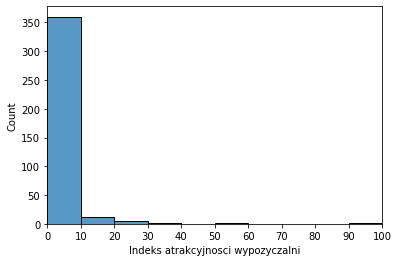

In [17]:
bins = calculate_bins(data['Indeks atrakcyjnosci wypozyczalni'].min(), data['Indeks atrakcyjnosci wypozyczalni'].max(), 10)
wypozyczalnia_hist = sns.histplot(data=data['Indeks atrakcyjnosci wypozyczalni'], bins = bins)
wypozyczalnia_hist.set_xlim(int(data['Indeks atrakcyjnosci wypozyczalni'].min()),int(data['Indeks atrakcyjnosci wypozyczalni'].max()))
wypozyczalnia_hist.set_xticks(bins)
wypozyczalnia_hist.set_xticklabels(bins)
wypozyczalnia_hist

### Histogram dla indeksu atrakcyjności salonu
Jak można zauważyć zdecydowana większość powiatów miejści się w przedziale z najmniejszą atrakcyjnościa dla salonu, co ma odzwierciedlenie w realnym życiu, ponieważ tylko w najbardziej zaludnionych czy też odwiedzanych lokalizacjach znajdują się salony/sklepy z drogimi/ekskluzywnymi przedmiotami, a takich lokalizacji znajduje się tylko kilknaście w całej polsce. Za taki przedmiot można uznać nowoczesny rower elektryczny.

<AxesSubplot:xlabel='Indeks atrakcyjnosci salonu', ylabel='Count'>

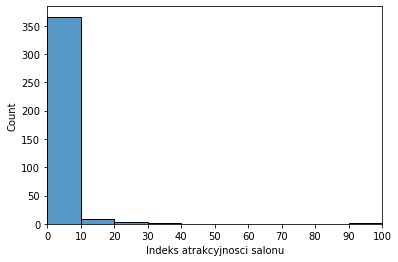

In [18]:
bins = calculate_bins(data['Indeks atrakcyjnosci salonu'].min(), data['Indeks atrakcyjnosci salonu'].max(), 10)
sklep_hist = sns.histplot(data=data['Indeks atrakcyjnosci salonu'], bins = bins)
sklep_hist.set_xlim(int(data['Indeks atrakcyjnosci salonu'].min()),int(data['Indeks atrakcyjnosci salonu'].max()))
sklep_hist.set_xticks(bins)
sklep_hist.set_xticklabels(bins)
sklep_hist

### TOP 5 najbardziej atrakcyjnych powiatów dla wypożyczalni
1. m. st. Warszawa - najbardziej atrakcyjne ze względu na zdecydowanie największą ilość mieszkańców i ich wysoki dochód oraz bardzo dużą ilość turystów
2. m. Kraków - jedno z najbardziej turystycznych miejsc w Polsce ponadto drugi najbardziej zaludniony powiat i wysoki średni dochód
3. m. Wrocław - czwarty najbardziej zaludniony powiat z wysokim średnim dochodem ponadto z dużą liczbę odwiedzających turystów
4. m. Gdańsk - jedno z najbardziej turystycznych miejsc w Polsce wraz z wysoki dochodem mieszkańców oraz wysoką liczbą mieszkańców
5. tatrzański - jedno z powiatów z największą ilością odwiedzających turystów w Polsce

In [19]:
indeks_atrakcyjnosci_wypozyczalni = data[["area", "Indeks atrakcyjnosci wypozyczalni"]]
indeks_atrakcyjnosci_wypozyczalni.sort_values(by='Indeks atrakcyjnosci wypozyczalni', ascending=False).head()

,area,Indeks atrakcyjnosci wypozyczalni
338,Powiat m. st. Warszawa,100.000000
6,Powiat m.Kraków,50.493777
157,Powiat m.Wrocław,37.562750
207,Powiat m.Gdańsk,35.900409
21,Powiat tatrzański,28.632227


### TOP 5 najbardziej atrakcyjnych powiatów dla salonu
1. m. st. Warszawa - najbardziej atrakcyjne ze względu na zdecydowanie największą ilość mieszkańców i ich bardzo wysoki dochód oraz ponadto powiat z duża ilością odwiedzających turystów
2. m. Kraków - drugi najbardziej zaludniony powiat z jednym z największych średnich dochód ponadto jedno z najbardziej turystycznych miejsc w Polsce 
3. m. Wrocław - powiat z jednym z najwiekszych średnich dochódów oraz czwarty najbardziej zaludniony powiat ponadto duża liczba odwiedzających turystów
4. m. Łódź - trzeci najbardziej zaludniony powiat w Polsce z średnio wysokim średnim dochodem na mieszkańca 
5. m. Poznań - piąty najbardziej zaludniony powiat w Polsce z wysokim średnim dochodem na mieszkańca

In [20]:
indeks_atrakcyjnosci_sklepu = data[["area", "Indeks atrakcyjnosci salonu"]]
indeks_atrakcyjnosci_sklepu.sort_values(by='Indeks atrakcyjnosci salonu', ascending=False).head()

,area,Indeks atrakcyjnosci salonu
338,Powiat m. st. Warszawa,100.000000
6,Powiat m.Kraków,39.034348
157,Powiat m.Wrocław,31.720466
238,Powiat m.Łódź,28.008471
106,Powiat m.Poznań,25.647798


### Zapis indeksów atrakcyjności do pliku .csv:

In [21]:
data[["area", "Indeks atrakcyjnosci wypozyczalni", "Indeks atrakcyjnosci salonu"]].to_csv('indeksy_atrakcyjnosci.csv', index=False, encoding='utf-16')

### Odczyt indeksów atrakcyjności z pliku .csv:

In [22]:
readDf = pd.read_csv('indeksy_atrakcyjnosci.csv',  encoding='utf-16')

In [23]:
readDf.sort_values(by='Indeks atrakcyjnosci salonu', ascending=False).head()

,area,Indeks atrakcyjnosci wypozyczalni,Indeks atrakcyjnosci salonu
338,Powiat m. st. Warszawa,100.000000,100.000000
6,Powiat m.Kraków,50.493777,39.034348
157,Powiat m.Wrocław,37.562750,31.720466
238,Powiat m.Łódź,23.185291,28.008471
106,Powiat m.Poznań,27.469950,25.647798
